# SN_HW1

## imports

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math, random

## Question 1

In [2]:

def build_1d_lattice(N, k=2):
    if k != 2:
        G = nx.Graph()
        G.add_nodes_from(range(N))
        half = k // 2
        for i in range(N):
            for d in range(1, half+1):
                G.add_edge(i, (i+d) % N)
                G.add_edge(i, (i-d) % N)
        return G
    else:
        return nx.cycle_graph(N)

def build_2d_lattice(N):
    L = int(round(N ** 0.5))
    L = max(L, 2)
    G = nx.grid_2d_graph(L, L)
    mapping = {node: i for i, node in enumerate(G.nodes())}
    return nx.relabel_nodes(G, mapping)

def build_3d_lattice(N):
    L = int(round(N ** (1/3)))
    L = max(L, 2)
    G = nx.grid_graph(dim=[L, L, L])
    mapping = {node: i for i, node in enumerate(G.nodes())}
    return nx.relabel_nodes(G, mapping)

def build_random_network(N, avg_k=4):
    p = avg_k / (N - 1)
    return nx.gnp_random_graph(N, p)

def approximate_average_shortest_path(G, num_sources=40):
    if not nx.is_connected(G):
        components = list(nx.connected_components(G))
        largest = max(components, key=len)
        G = G.subgraph(largest).copy()
    nodes = list(G.nodes())
    n = len(nodes)
    num_sources = min(num_sources, n)
    sources = random.sample(nodes, num_sources)
    total = 0.0
    count = 0
    for s in sources:
        lengths = nx.single_source_shortest_path_length(G, s)
        for t, d in lengths.items():
            if t != s:
                total += d
                count += 1
    return total / count, n


In [3]:

N_values = np.round(np.logspace(np.log10(500), np.log10(5000), num=6)).astype(int)
results = {kind: [] for kind in ["1d","2d","3d","rn"]}

for N in N_values:
    print(f"N = {N}")
    G1 = build_1d_lattice(N)
    d1, size1 = approximate_average_shortest_path(G1, num_sources=40)
    results["1d"].append((size1, d1))

    G2 = build_2d_lattice(N)
    d2, size2 = approximate_average_shortest_path(G2, num_sources=40)
    results["2d"].append((size2, d2))

    G3 = build_3d_lattice(N)
    d3, size3 = approximate_average_shortest_path(G3, num_sources=40)
    results["3d"].append((size3, d3))

    G4 = build_random_network(N)
    d4, size4 = approximate_average_shortest_path(G4, num_sources=40)
    results["rn"].append((size4, d4))

results


N = 500
N = 792
N = 1256
N = 1991
N = 3155
N = 5000


{'1d': [(500, 125.25050100200401),
  (792, 198.2503160556258),
  (1256, 314.25019920318726),
  (1991, 498.0),
  (3155, 789.0),
  (5000, 1250.250050010002)],
 '2d': [(484, 15.46376811594203),
  (784, 18.0301404853129),
  (1225, 24.358455882352942),
  (2025, 29.650753458498023),
  (3136, 36.93945773524721),
  (5041, 47.022708333333334)],
 '3d': [(512, 7.877886497064579),
  (729, 8.645192307692307),
  (1331, 11.29484962406015),
  (2197, 12.71540300546448),
  (3375, 14.636003260225252),
  (4913, 16.506300895765474)],
 'rn': [(490, 4.56140081799591),
  (775, 4.922060723514212),
  (1229, 5.336889250814332),
  (1954, 5.484408602150538),
  (3107, 5.8125241468126205),
  (4921, 6.252007113821138)]}

d_1d=[ 125.250501    198.25031606  314.2501992   498.          789.
 1250.25005001]
d_2d=[15.46376812 18.03014049 24.35845588 29.65075346 36.93945774 47.02270833]
d_3d=[ 7.8778865   8.64519231 11.29484962 12.71540301 14.63600326 16.5063009 ]
d_rn=[4.56140082 4.92206072 5.33688925 5.4844086  5.81252415 6.25200711]


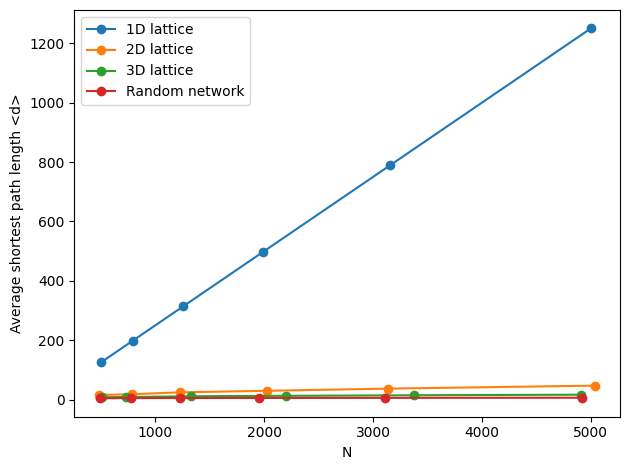

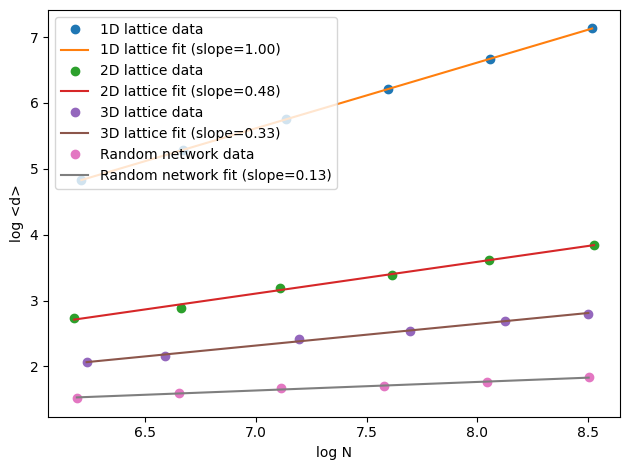

{'1d': (np.float64(0.9992466714055228), np.float64(-1.3798986143388299)),
 '2d': (np.float64(0.4825669487451339), np.float64(-0.2718095701088864)),
 '3d': (np.float64(0.33001865050598933), np.float64(0.006942840473610231)),
 'rn': (np.float64(0.13004896328907944), np.float64(0.7246780655105941))}

In [4]:

def extract_xy(kind):
    Ns = np.array([n for (n, d) in results[kind]])
    ds = np.array([d for (n, d) in results[kind]])
    return Ns, ds

Ns_1d, d_1d = extract_xy("1d")
Ns_2d, d_2d = extract_xy("2d")
Ns_3d, d_3d = extract_xy("3d")
Ns_rn, d_rn = extract_xy("rn")

print(f'd_1d={d_1d}')
print(f'd_2d={d_2d}')
print(f'd_3d={d_3d}')
print(f'd_rn={d_rn}')

plt.figure()
plt.plot(Ns_1d, d_1d, marker='o', label='1D lattice')
plt.plot(Ns_2d, d_2d, marker='o', label='2D lattice')
plt.plot(Ns_3d, d_3d, marker='o', label='3D lattice')
plt.plot(Ns_rn, d_rn, marker='o', label='Random network')
plt.xlabel('N')
plt.ylabel('Average shortest path length <d>')
plt.legend()
plt.tight_layout()
plt.show()

slopes = {}
plt.figure()
for Ns, ds, label_key, label in [
    (Ns_1d, d_1d, "1d", "1D lattice"),
    (Ns_2d, d_2d, "2d", "2D lattice"),
    (Ns_3d, d_3d, "3d", "3D lattice"),
    (Ns_rn, d_rn, "rn", "Random network"),
]:
    logN = np.log(Ns)
    logd = np.log(ds)
    slope, intercept = np.polyfit(logN, logd, 1)
    slopes[label_key] = (slope, intercept)
    xfit = np.linspace(logN.min(), logN.max(), 100)
    yfit = slope * xfit + intercept
    plt.plot(logN, logd, 'o', label=f'{label} data')
    plt.plot(xfit, yfit, '-', label=f'{label} fit (slope={slope:.2f})')

plt.xlabel('log N')
plt.ylabel('log <d>')
plt.legend()
plt.tight_layout()
plt.show()

slopes


## Question 2

In [5]:
def generate_barcodes(b):
    return [format(i, f'0{b}b') for i in range(2**b)]

def matches_pattern(code, pattern):
    for c, p in zip(code, pattern):
        if p != 'X' and c != p:
            return False
    return True

In [6]:

def build_deterministic_scale_free(b):
    N = 2**b
    codes = generate_barcodes(b)
    G = nx.DiGraph()
    G.add_nodes_from(range(N))
    for i in range(b+1):
        S_pattern = '0'*i + 'X'*(b-i)
        D_pattern = 'X'*i + '1'*(b-i)
        S_nodes = [n for n, code in enumerate(codes) if matches_pattern(code, S_pattern)]
        D_nodes = [n for n, code in enumerate(codes) if matches_pattern(code, D_pattern)]
        for u in S_nodes:
            for v in D_nodes:
                G.add_edge(u, v)
    return G

b = 10
G_det = build_deterministic_scale_free(b)
N_det = G_det.number_of_nodes()
M_det = G_det.number_of_edges()
N_det, M_det


(1024, 6144)

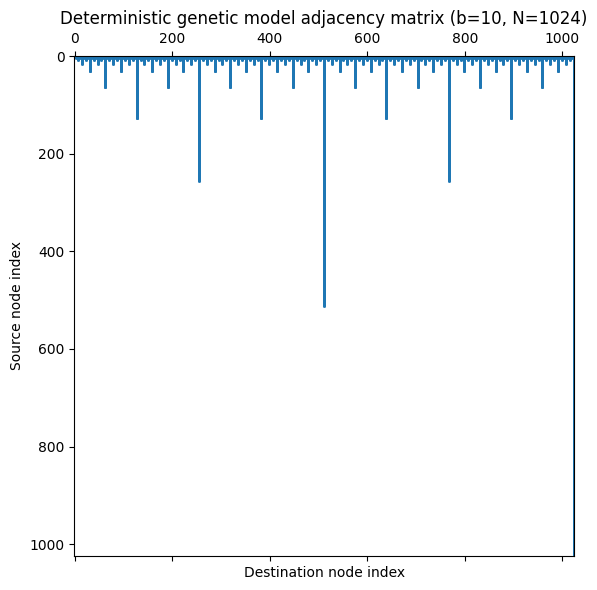

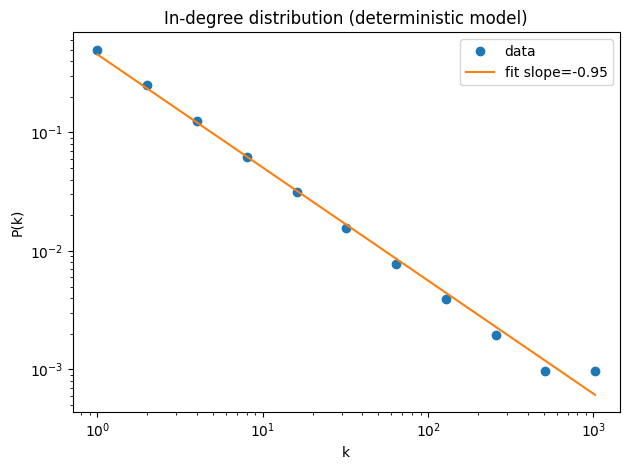

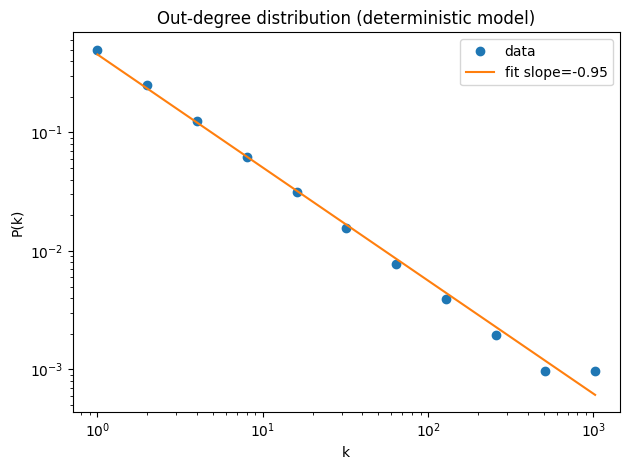

(np.float64(-0.9545454545454546), np.float64(-0.9545454545454546))

In [7]:
A = nx.to_scipy_sparse_array(G_det, nodelist=sorted(G_det.nodes()))

plt.figure(figsize=(6,6))
plt.spy(A, markersize=1)
plt.title("Deterministic genetic model adjacency matrix (b=10, N=1024)")
plt.xlabel("Destination node index")
plt.ylabel("Source node index")
plt.tight_layout()
plt.show()

in_degrees = np.array([d for _, d in G_det.in_degree()])
out_degrees = np.array([d for _, d in G_det.out_degree()])

def degree_distribution(degrees):
    unique, counts = np.unique(degrees, return_counts=True)
    Pk = counts / degrees.size
    return unique, Pk

def fit_power_law(k_vals, Pk):
    mask = (k_vals > 0) & (Pk > 0)
    kv = k_vals[mask]
    pv = Pk[mask]
    logk = np.log(kv)
    logp = np.log(pv)
    slope, intercept = np.polyfit(logk, logp, 1)
    return slope, intercept, kv, pv

k_in, P_in = degree_distribution(in_degrees)
k_out, P_out = degree_distribution(out_degrees)

slope_in, intercept_in, kv_in, pv_in = fit_power_law(k_in, P_in)
slope_out, intercept_out, kv_out, pv_out = fit_power_law(k_out, P_out)

def plot_deg_with_fit(k_vals, Pk, slope, intercept, title):
    mask = (k_vals > 0) & (Pk > 0)
    kv = k_vals[mask]
    pv = Pk[mask]
    logk = np.log(kv)
    logp = np.log(pv)
    xfit = np.linspace(logk.min(), logk.max(), 100)
    yfit = slope * xfit + intercept

    plt.figure()
    plt.loglog(kv, pv, 'o', label='data')
    plt.loglog(np.exp(xfit), np.exp(yfit), '-', label=f'fit slope={slope:.2f}')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_deg_with_fit(k_in, P_in, slope_in, intercept_in,
                  "In-degree distribution (deterministic model)")
plot_deg_with_fit(k_out, P_out, slope_out, intercept_out,
                  "Out-degree distribution (deterministic model)")

slope_in, slope_out

In [8]:

def generate_random_pattern(b, x):
    positions = list(range(b))
    X_pos = set(random.sample(positions, x))
    pattern = []
    for i in range(b):
        if i in X_pos:
            pattern.append('X')
        else:
            pattern.append(random.choice(['0','1']))
    return ''.join(pattern)

def build_RG_graph(b, x, r):
    N = 2**b
    codes = generate_barcodes(b)
    G = nx.DiGraph()
    G.add_nodes_from(range(N))
    for rule_idx in range(r):
        S_pattern = generate_random_pattern(b, x)
        D_pattern = generate_random_pattern(b, x)
        S_nodes = [n for n, code in enumerate(codes) if matches_pattern(code, S_pattern)]
        D_nodes = [n for n, code in enumerate(codes) if matches_pattern(code, D_pattern)]
        for u in S_nodes:
            for v in D_nodes:
                G.add_edge(u, v)
    return G

def compute_density(G):
    N = G.number_of_nodes()
    M = G.number_of_edges()
    return M / (N**2)

b = 10
x_values = list(range(1, 9))
r_values = np.unique(np.round(np.logspace(np.log10(2), np.log10(160), num=10)).astype(int))
r_values = sorted(r_values)

density_sim = np.zeros((len(x_values), len(r_values)))
density_theory = np.zeros_like(density_sim)

for ix, x in enumerate(x_values):
    pi = 2**(x - b)
    for ir, r in enumerate(r_values):
        rho_th = 1 - (1 - pi**2)**(2*r)
        density_theory[ix, ir] = rho_th
        G_rg = build_RG_graph(b, x, r)
        density_sim[ix, ir] = compute_density(G_rg)

density_sim, density_theory


(array([[7.62939453e-06, 1.14440918e-05, 1.90734863e-05, 3.43322754e-05,
         5.34057617e-05, 8.77380371e-05, 1.41143799e-04, 2.28881836e-04,
         3.73840332e-04, 6.10351562e-04],
        [3.05175781e-05, 4.57763672e-05, 7.62939453e-05, 1.37329102e-04,
         2.13623047e-04, 3.50952148e-04, 5.64575195e-04, 9.15527344e-04,
         1.49345398e-03, 2.43949890e-03],
        [1.22070312e-04, 1.83105469e-04, 3.05175781e-04, 5.49316406e-04,
         8.54492188e-04, 1.40380859e-03, 2.25830078e-03, 3.65543365e-03,
         5.95951080e-03, 9.73796844e-03],
        [4.88281250e-04, 7.32421875e-04, 1.22070312e-03, 2.19535828e-03,
         3.41606140e-03, 5.61141968e-03, 9.00268555e-03, 1.45940781e-02,
         2.36845016e-02, 3.83491516e-02],
        [1.95312500e-03, 2.92968750e-03, 4.88281250e-03, 8.76617432e-03,
         1.35650635e-02, 2.22702026e-02, 3.55262756e-02, 5.70268631e-02,
         9.10902023e-02, 1.45495415e-01],
        [7.75146484e-03, 1.17187500e-02, 1.92871094e-02, 3.4

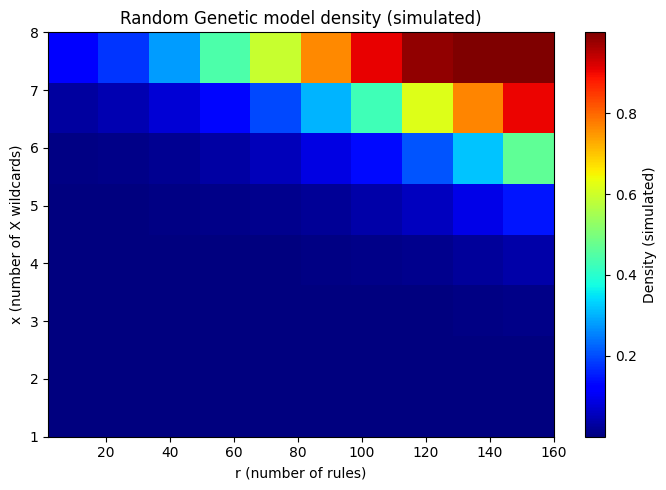

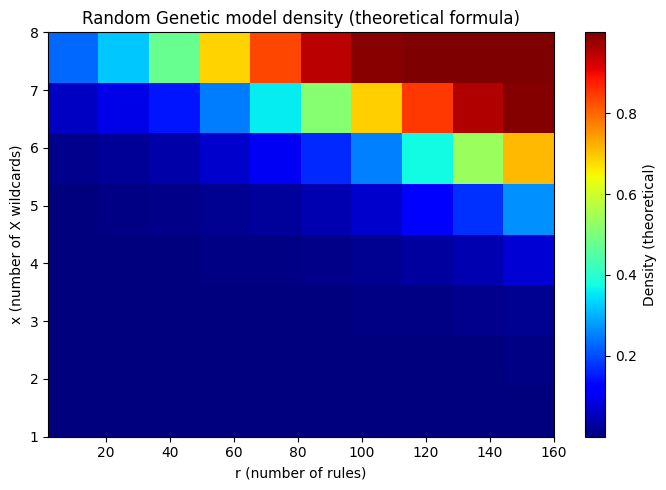

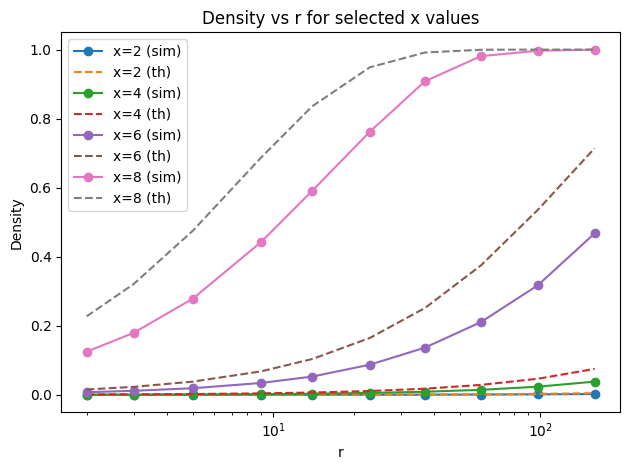

In [9]:

X_grid, R_grid = np.meshgrid(r_values, x_values)

plt.figure(figsize=(7,5))
plt.imshow(density_sim, aspect='auto', origin='lower',cmap='jet',
           extent=[min(r_values), max(r_values), min(x_values), max(x_values)])
plt.colorbar(label='Density (simulated)')
plt.xlabel('r (number of rules)')
plt.ylabel('x (number of X wildcards)')
plt.title('Random Genetic model density (simulated)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.imshow(density_theory, aspect='auto', origin='lower',cmap='jet',
           extent=[min(r_values), max(r_values), min(x_values), max(x_values)])
plt.colorbar(label='Density (theoretical)')
plt.xlabel('r (number of rules)')
plt.ylabel('x (number of X wildcards)')
plt.title('Random Genetic model density (theoretical formula)')
plt.tight_layout()
plt.show()

slice_x_values = [2, 4, 6, 8]
slice_indices = [x_values.index(v) for v in slice_x_values]

plt.figure()
for idx, x in zip(slice_indices, slice_x_values):
    plt.plot(r_values, density_sim[idx], marker='o', label=f'x={x} (sim)')
    plt.plot(r_values, density_theory[idx], linestyle='--', label=f'x={x} (th)')
plt.xscale('log')
plt.xlabel('r')
plt.ylabel('Density')
plt.title('Density vs r for selected x values')
plt.legend()
plt.tight_layout()
plt.show()


## Question 3

In [10]:
def simulate_ER_giant_and_susceptibility(N, k_values, R=30, seed_base=0):
    k_values = np.array(k_values, dtype=float)
    S_means, S_stds = [], []
    s_means, s_stds = [], []
    for idx, k in enumerate(k_values):
        p = k / (N - 1)
        S_list, s_list = [], []
        for r in range(R):
            G = nx.fast_gnp_random_graph(N, p, seed=seed_base + idx*R + r)
            comp_sizes = [len(c) for c in nx.connected_components(G)]
            comp_sizes.sort(reverse=True)
            NG = comp_sizes[0]
            S = NG / N
            if len(comp_sizes) > 1:
                small = comp_sizes[1:]
                s_avg = sum(small) / len(small)
            else:
                s_avg = 0.0
            S_list.append(S)
            s_list.append(s_avg)
        S_means.append(np.mean(S_list))
        S_stds.append(np.std(S_list))
        s_means.append(np.mean(s_list))
        s_stds.append(np.std(s_list))
    return {
        "k": k_values,
        "S_mean": np.array(S_means),
        "S_std": np.array(S_stds),
        "s_mean": np.array(s_means),
        "s_std": np.array(s_stds),
    }


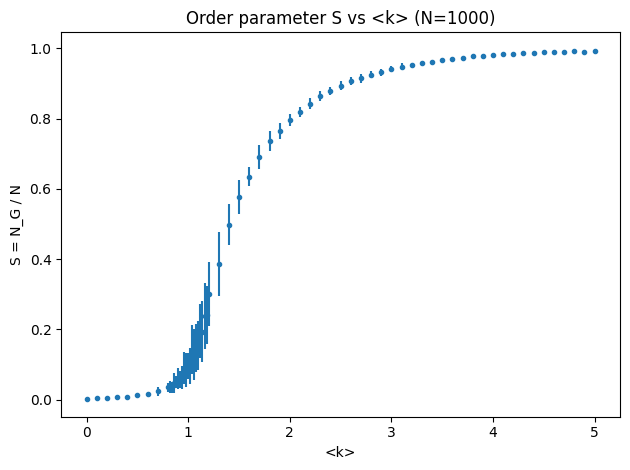

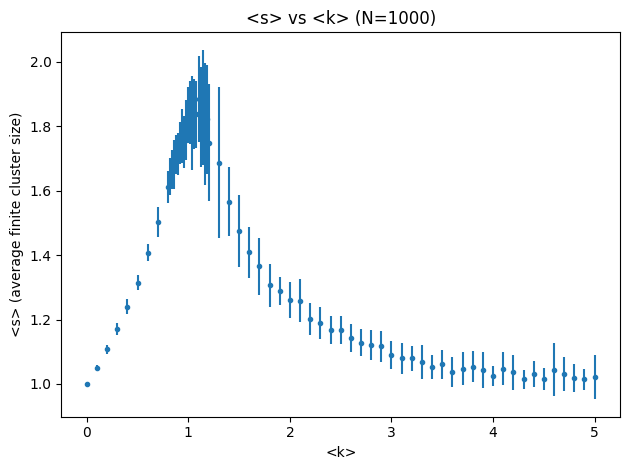

In [11]:

# Part (a): N=1000, variable <k>
N_a = 1000
k_values_a = []

k_values_a += list(np.arange(0.0, 0.8, 0.1))
k_values_a += list(np.arange(0.8, 1.2001, 0.02))
k_values_a += list(np.arange(1.2, 5.0001, 0.1))

k_values_a = sorted(set(round(k, 4) for k in k_values_a))

results_a = simulate_ER_giant_and_susceptibility(N_a, k_values_a, R=30, seed_base=100)

plt.figure()
plt.errorbar(results_a["k"], results_a["S_mean"], yerr=results_a["S_std"], fmt='o', markersize=3)
plt.xlabel("<k>")
plt.ylabel("S = N_G / N")
plt.title("Order parameter S vs <k> (N=1000)")
plt.tight_layout()
plt.show()

plt.figure()
plt.errorbar(results_a["k"], results_a["s_mean"], yerr=results_a["s_std"], fmt='o', markersize=3)
plt.xlabel("<k>")
plt.ylabel("<s> (average finite cluster size)")
plt.title("<s> vs <k> (N=1000)")
plt.tight_layout()
plt.show()


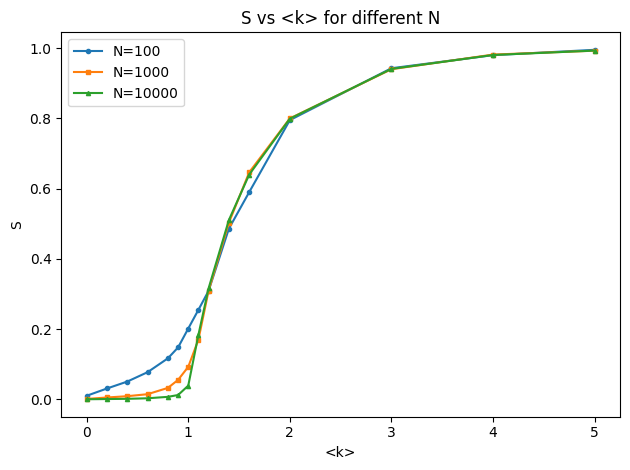

In [12]:

def simulate_ER_giant_only(N, k_values, R=20, seed_base=0):
    k_values = np.array(k_values, dtype=float)
    S_means, S_stds = [], []
    for idx, k in enumerate(k_values):
        p = k / (N - 1)
        S_list = []
        for r in range(R):
            G = nx.fast_gnp_random_graph(N, p, seed=seed_base + idx*R + r)
            comp_sizes = [len(c) for c in nx.connected_components(G)]
            NG = max(comp_sizes)
            S_list.append(NG / N)
        S_means.append(np.mean(S_list))
        S_stds.append(np.std(S_list))
    return {
        "k": k_values,
        "S_mean": np.array(S_means),
        "S_std": np.array(S_stds),
    }

k_values_c = sorted(set([0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0, 1.1, 1.2,
                         1.4, 1.6, 2.0, 3.0, 4.0, 5.0]))

results_c_100   = simulate_ER_giant_only(100,   k_values_c, R=40, seed_base=200)
results_c_1000  = simulate_ER_giant_only(1000,  k_values_c, R=30, seed_base=400)
results_c_10000 = simulate_ER_giant_only(10000, k_values_c, R=15, seed_base=600)

plt.figure()
plt.errorbar(results_c_100["k"], results_c_100["S_mean"], fmt='o-', markersize=3, label='N=100')
plt.errorbar(results_c_1000["k"], results_c_1000["S_mean"], fmt='s-', markersize=3, label='N=1000')
plt.errorbar(results_c_10000["k"], results_c_10000["S_mean"], fmt='^-', markersize=3, label='N=10000')
plt.xlabel("<k>")
plt.ylabel("S")
plt.title("S vs <k> for different N")
plt.legend()
plt.tight_layout()
plt.show()


[np.int64(44), np.int64(45), np.int64(50), np.int64(51), np.int64(55), np.int64(57), np.int64(72), np.int64(116), np.int64(240), np.int64(261)]


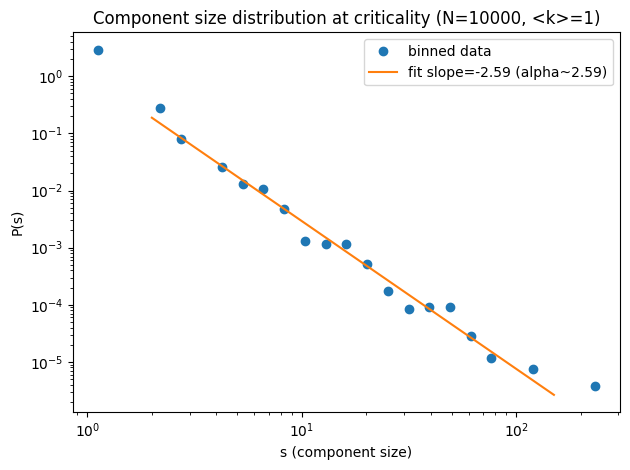

(np.float64(-2.587673019818704), np.float64(2.587673019818704))

In [13]:

# Part (d): critical state at N=10000, <k>=1
N_d = 10000
k_crit = 1.0
p_crit = k_crit / (N_d - 1)
G_crit = nx.fast_gnp_random_graph(N_d, p_crit, seed=1234)

comp_sizes = np.array([len(c) for c in nx.connected_components(G_crit)], dtype=int)
print(sorted(set(comp_sizes))[-10:])
sizes = comp_sizes
total_components = len(sizes)

s_min = 1
s_max = sizes.max()
num_bins = 25
bins = np.logspace(np.log10(s_min), np.log10(s_max), num=num_bins+1)
counts, edges = np.histogram(sizes, bins=bins)

bin_centers = np.sqrt(edges[:-1] * edges[1:])
bin_widths = edges[1:] - edges[:-1]
P_bin = counts / (total_components * bin_widths)

mask = (counts > 0) & (bin_centers >= 2) & (bin_centers <= 150)
log_s = np.log(bin_centers[mask])
log_P = np.log(P_bin[mask])

slope, intercept = np.polyfit(log_s, log_P, 1)
alpha_est = -slope

plt.figure()
plt.loglog(bin_centers, P_bin, 'o', label='binned data')
s_fit = np.logspace(np.log10(2), np.log10(150), 100)
P_fit = np.exp(intercept) * s_fit**slope
plt.loglog(s_fit, P_fit, '-', label=f'fit slope={slope:.2f} (alpha~{alpha_est:.2f})')
plt.xlabel("s (component size)")
plt.ylabel("P(s)")
plt.title(f"Component size distribution at criticality (N={N_d}, <k>=1)")
plt.legend()
plt.tight_layout()
plt.show()

slope, alpha_est
